### loading libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

### Reading the dataset

In [2]:
df=pd.read_csv('train.csv')
df

,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
0,1,25,Female,Instagram,120.0,3.0,45.0,10.0,12.0,Happiness
1,2,30,Male,Twitter,90.0,5.0,20.0,25.0,30.0,Anger
2,3,22,Non-binary,Facebook,60.0,2.0,15.0,5.0,20.0,Neutral
3,4,28,Female,Instagram,200.0,8.0,100.0,30.0,50.0,Anxiety
4,5,33,Male,LinkedIn,45.0,1.0,5.0,2.0,10.0,Boredom
...,...,...,...,...,...,...,...,...,...,...
996,996,33,Non-binary,Twitter,85.0,4.0,35.0,18.0,18.0,Boredom
997,997,22,Female,Facebook,70.0,1.0,14.0,6.0,10.0,Neutral
998,998,35,Male,Whatsapp,110.0,3.0,50.0,25.0,25.0,Happiness
999,999,28,Non-binary,Telegram,60.0,2.0,18.0,8.0,18.0,Anger


### Data preprocessing

<b>Handling missing and duplicated data<b>

In [3]:
print(df.isna().sum())
print(df.isna().sum().sum())

User_ID                       0
Age                           0
Gender                        1
Platform                      1
Daily_Usage_Time (minutes)    1
Posts_Per_Day                 1
Likes_Received_Per_Day        1
Comments_Received_Per_Day     1
Messages_Sent_Per_Day         1
Dominant_Emotion              1
dtype: int64
8


In [4]:
df=df.dropna()
print(df.isna().sum())
print('Missing Values : ',df.isna().sum().sum())
print('Duplicated Values : ',df.duplicated().sum())

User_ID                       0
Age                           0
Gender                        0
Platform                      0
Daily_Usage_Time (minutes)    0
Posts_Per_Day                 0
Likes_Received_Per_Day        0
Comments_Received_Per_Day     0
Messages_Sent_Per_Day         0
Dominant_Emotion              0
dtype: int64
Missing Values :  0
Duplicated Values :  0


In [5]:
df

,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
0,1,25,Female,Instagram,120.0,3.0,45.0,10.0,12.0,Happiness
1,2,30,Male,Twitter,90.0,5.0,20.0,25.0,30.0,Anger
2,3,22,Non-binary,Facebook,60.0,2.0,15.0,5.0,20.0,Neutral
3,4,28,Female,Instagram,200.0,8.0,100.0,30.0,50.0,Anxiety
4,5,33,Male,LinkedIn,45.0,1.0,5.0,2.0,10.0,Boredom
...,...,...,...,...,...,...,...,...,...,...
996,996,33,Non-binary,Twitter,85.0,4.0,35.0,18.0,18.0,Boredom
997,997,22,Female,Facebook,70.0,1.0,14.0,6.0,10.0,Neutral
998,998,35,Male,Whatsapp,110.0,3.0,50.0,25.0,25.0,Happiness
999,999,28,Non-binary,Telegram,60.0,2.0,18.0,8.0,18.0,Anger


<b>Dropping unnessesary columns<b>

In [6]:
df=df.drop(columns=['User_ID'],axis=1)

<b>Handling Wrongly Entered Data<b>

In [7]:
df['Age'].value_counts()

Age
28            92
27            92
29            90
22            74
26            66
25            64
24            64
31            62
21            56
33            56
30            48
23            48
35            38
32            38
34            36
Male          28
Female        26
Non-binary    22
Name: count, dtype: int64

In [8]:
df[df['Age'].isin(['Male','Female','Non-binary'])]

,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
250,Male,27,Instagram,165.0,6.0,85.0,30.0,28.0,Happiness
251,Female,24,Twitter,75.0,3.0,33.0,18.0,19.0,Anger
252,Non-binary,29,Facebook,85.0,2.0,27.0,9.0,20.0,Neutral
253,Female,33,Instagram,145.0,4.0,65.0,23.0,35.0,Sadness
254,Male,31,LinkedIn,60.0,1.0,15.0,7.0,17.0,Anxiety
...,...,...,...,...,...,...,...,...,...
784,Male,22,Twitter,70.0,1.0,22.0,7.0,22.0,Neutral
785,Non-binary,29,Facebook,75.0,2.0,20.0,8.0,20.0,Boredom
786,Female,28,Whatsapp,100.0,4.0,37.0,14.0,26.0,Anxiety
787,Male,31,Telegram,85.0,3.0,45.0,20.0,28.0,Sadness


In [9]:
condition=df['Age'].isin(['Female','Male','Non-binary'])
df.loc[condition, ['Age', 'Gender']] = df.loc[condition, ['Gender', 'Age']].values
print(df['Gender'].unique())
print(df['Age'].unique())

['Female' 'Male' 'Non-binary']
['25' '30' '22' '28' '33' '21' '27' '24' '29' '31' '23' '26' '34' '35'
 '32']


<b>Handling Outliers<b>

In [10]:
df.loc[:,'Age']=df['Age'].astype('int')

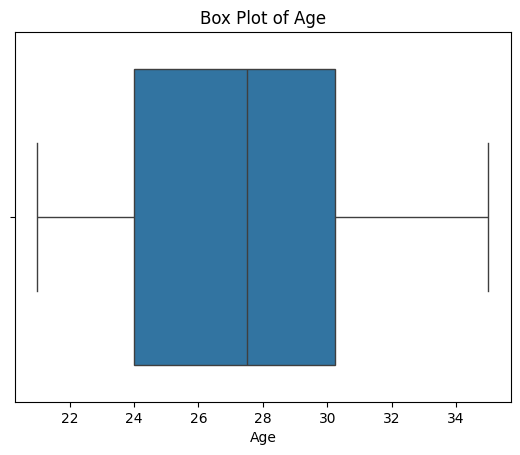

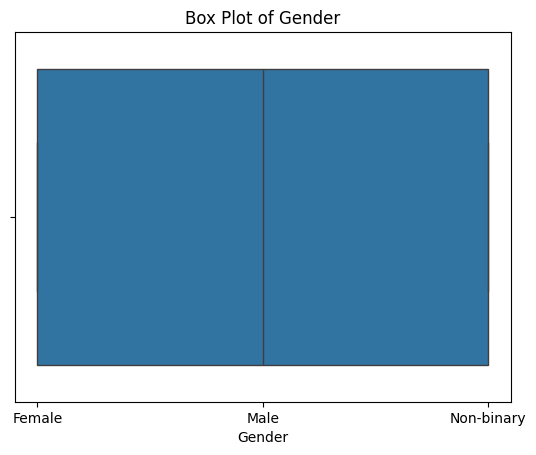

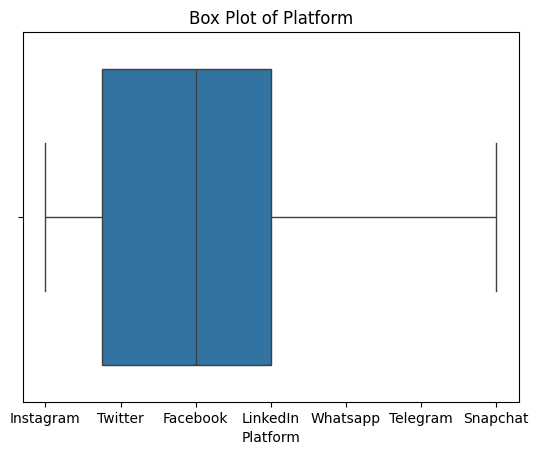

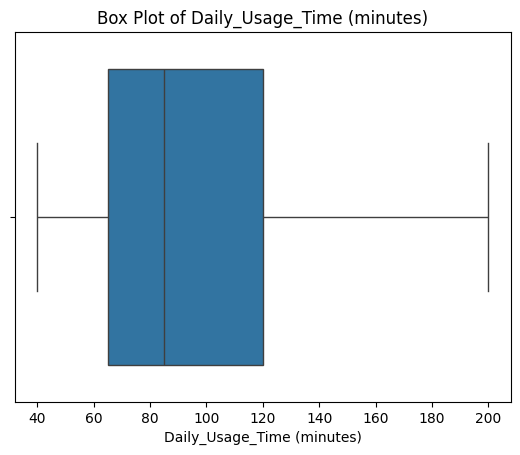

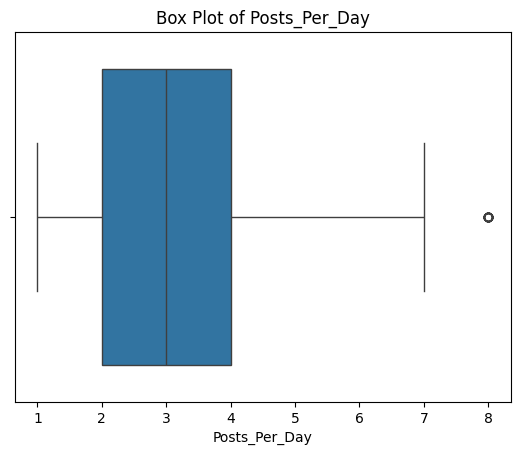

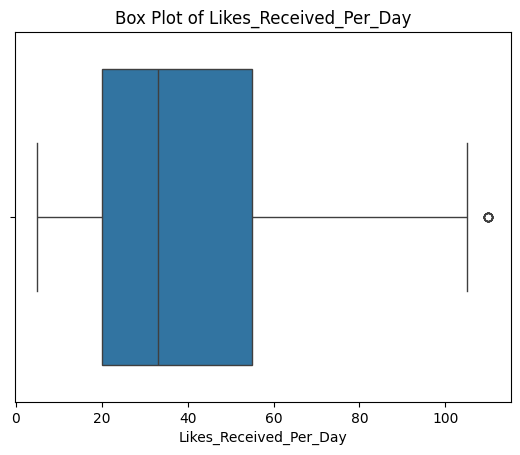

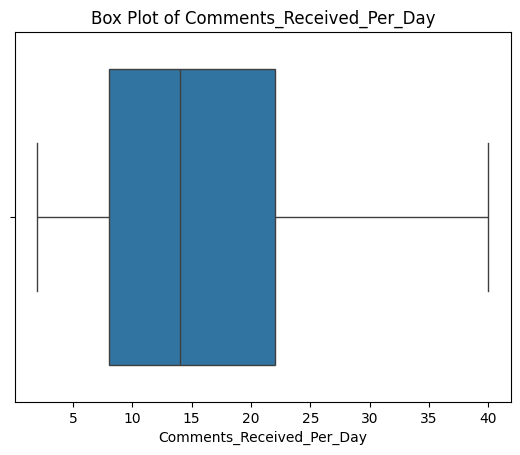

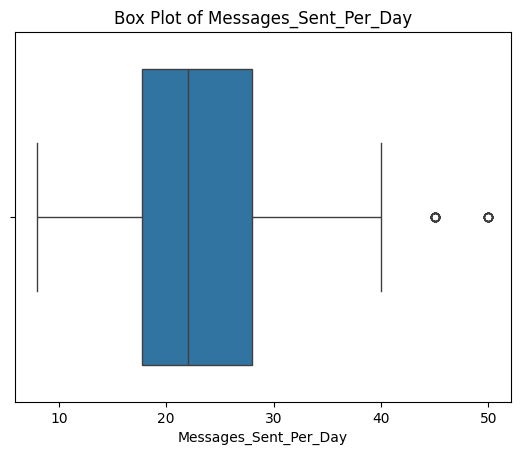

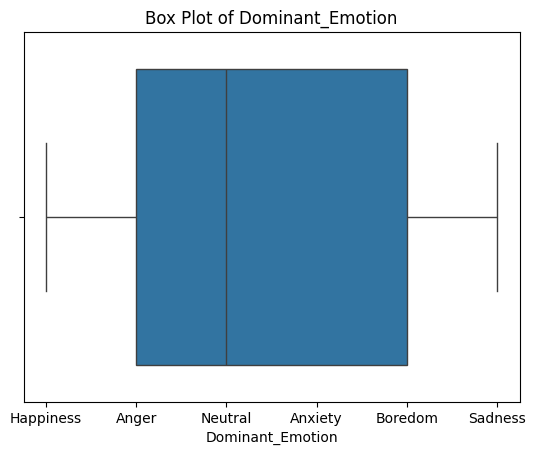

In [11]:
for column in df.columns:
    sns.boxplot(x=df[column])
    plt.title(f'Box Plot of {column}')
    plt.show()

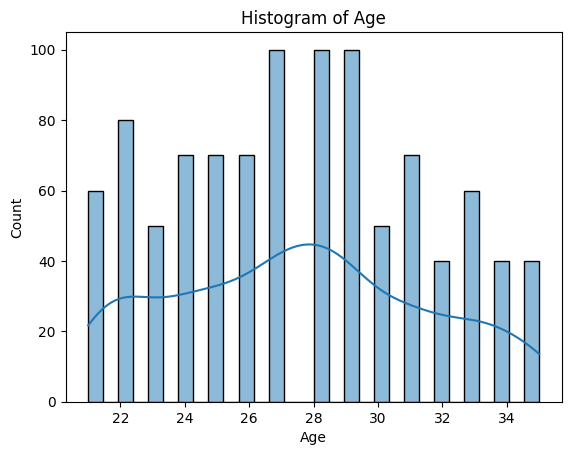

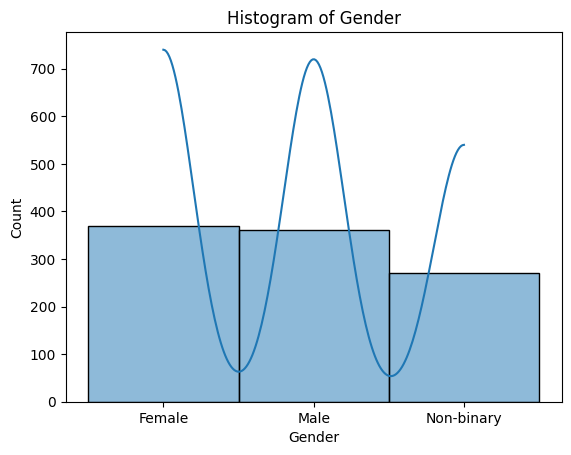

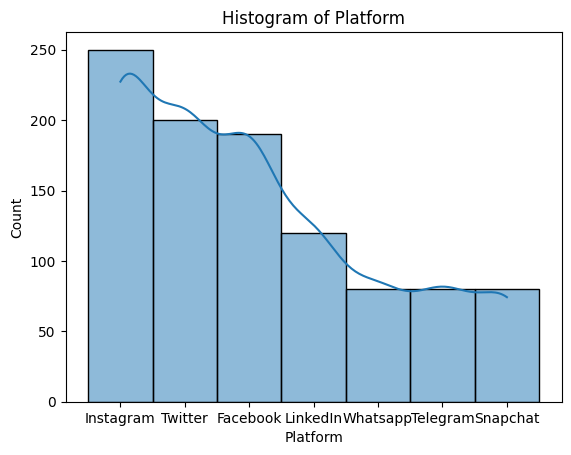

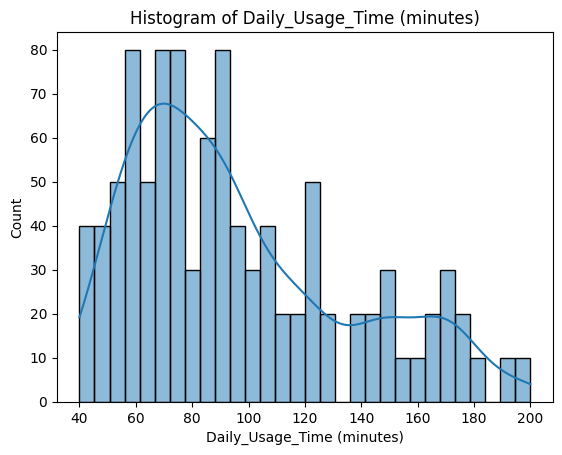

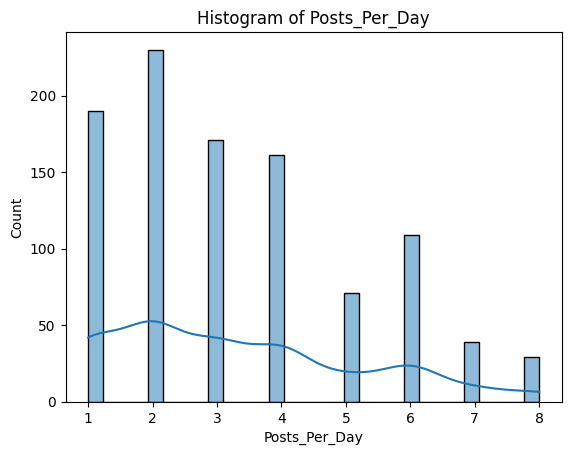

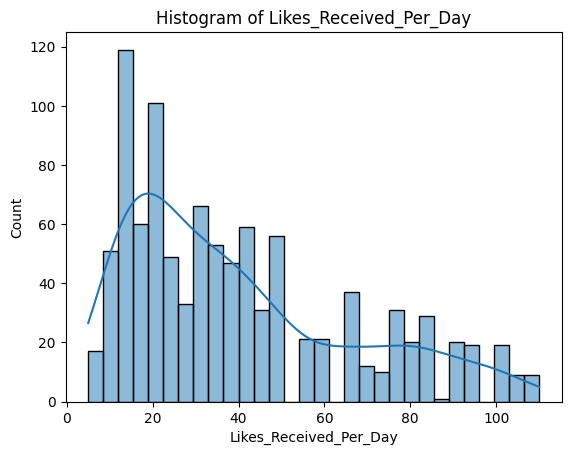

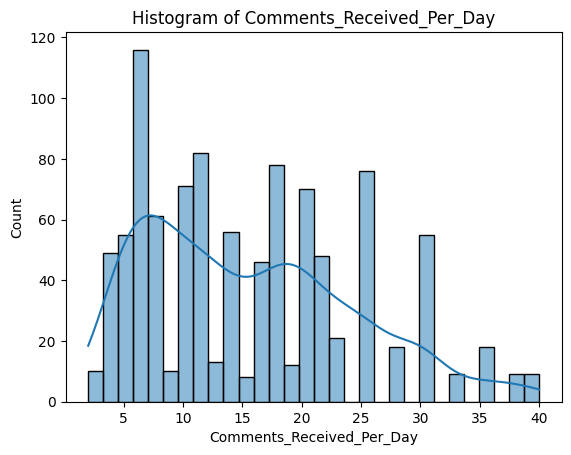

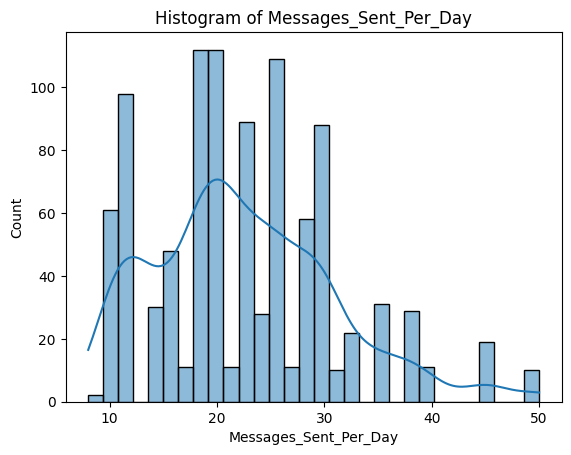

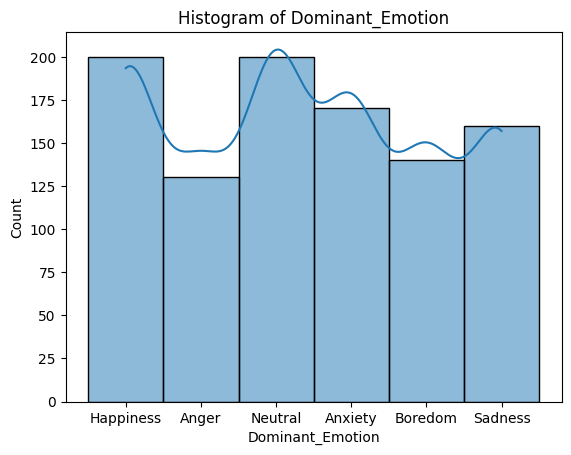

In [12]:
for column in df.columns:
    sns.histplot(df[column], bins=30, kde=True)
    plt.title(f'Histogram of {column}')
    plt.show()

In [13]:
Q1= df['Age'].astype('int').quantile(0.25)
Q3= df['Age'].astype('int').quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q1 + 1.5*IQR
print('Lower limit of Age : ',lower)
print('Upper Limit of Age : ',upper)
outliers_iqr = df[(df['Age'].astype('int') < lower) | (df['Age'].astype('int') > upper)]
print('Number of outliers in Age :', len(outliers_iqr))
Q1= df['Daily_Usage_Time (minutes)'].quantile(0.25)
Q3= df['Daily_Usage_Time (minutes)'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q1 + 1.5*IQR
print('Lower limit of Daily_Usage_Time (minutes) : ',lower)
print('Upper Limit of Daily_Usage_Time (minutes) : ',upper)
outliers_iqr = df[(df['Daily_Usage_Time (minutes)'] < lower) | (df['Daily_Usage_Time (minutes)'] > upper)]
print('Number of outliers in Daily_Usage_Time (minutes) :', len(outliers_iqr))
print('Outliers in Daily_Usage_Time (minutes) :', outliers_iqr['Daily_Usage_Time (minutes)'].values)
z_scores = np.abs((df['Daily_Usage_Time (minutes)'] - df['Daily_Usage_Time (minutes)'].mean()) / df['Daily_Usage_Time (minutes)'].std()) # find z_scores
threshold = 3        # Filter out outliers 
df_no_outliers = df[z_scores <= threshold]
print(df_no_outliers)

Lower limit of Age :  14.625
Upper Limit of Age :  33.375
Number of outliers in Age : 80
Lower limit of Daily_Usage_Time (minutes) :  -17.5
Upper Limit of Daily_Usage_Time (minutes) :  147.5
Number of outliers in Daily_Usage_Time (minutes) : 150
Outliers in Daily_Usage_Time (minutes) : [200. 150. 170. 180. 190. 160. 170. 150. 175. 165. 175. 165. 155. 170.
 150. 200. 150. 170. 180. 190. 160. 170. 150. 175. 165. 175. 165. 155.
 170. 150. 200. 150. 170. 180. 190. 160. 170. 150. 175. 165. 175. 165.
 155. 170. 150. 200. 150. 170. 180. 190. 160. 170. 150. 175. 165. 175.
 165. 155. 170. 150. 200. 150. 170. 180. 190. 160. 170. 150. 175. 165.
 175. 165. 155. 170. 150. 200. 150. 170. 180. 190. 160. 170. 150. 175.
 165. 175. 165. 155. 170. 150. 200. 150. 170. 180. 190. 160. 170. 150.
 175. 165. 175. 165. 155. 170. 150. 200. 150. 170. 180. 190. 160. 170.
 150. 175. 165. 175. 165. 155. 170. 150. 200. 150. 170. 180. 190. 160.
 170. 150. 175. 165. 175. 165. 155. 170. 150. 200. 150. 170. 180. 190.
 16

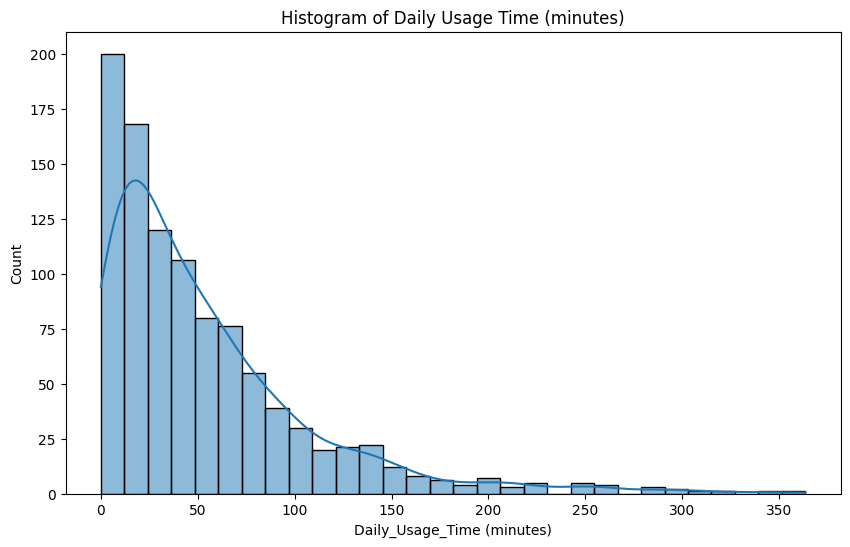

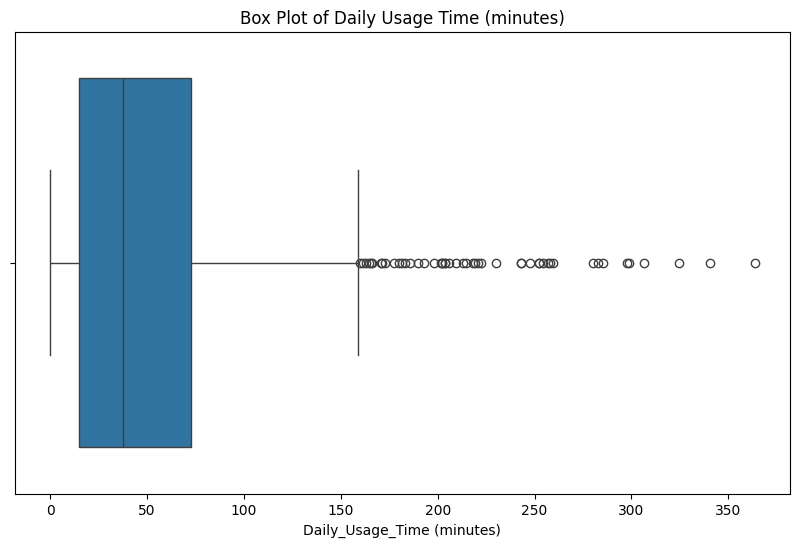

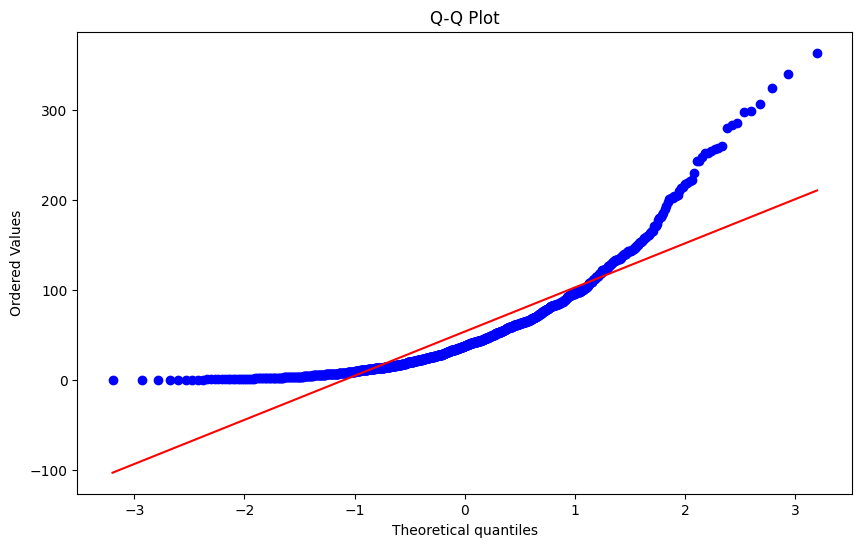

Number of outliers (IQR method): 49
Number of outliers (Z-score method): 23


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Assuming 'df' is your DataFrame and 'Daily_Usage_Time (minutes)' is your column of interest
data = np.random.exponential(scale=50, size=1000)  # Replace with your actual data
df = pd.DataFrame({'Daily_Usage_Time (minutes)': data})

# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['Daily_Usage_Time (minutes)'], bins=30, kde=True)
plt.title('Histogram of Daily Usage Time (minutes)')
plt.show()

# Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Daily_Usage_Time (minutes)'])
plt.title('Box Plot of Daily Usage Time (minutes)')
plt.show()
# Q-Q Plot
plt.figure(figsize=(10, 6))
stats.probplot(df['Daily_Usage_Time (minutes)'], dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.show()
Q1 = df['Daily_Usage_Time (minutes)'].quantile(0.25)
Q3 = df['Daily_Usage_Time (minutes)'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_iqr = df[(df['Daily_Usage_Time (minutes)'] < lower_bound) | (df['Daily_Usage_Time (minutes)'] > upper_bound)]
print("Number of outliers (IQR method):", len(outliers_iqr))
mean = df['Daily_Usage_Time (minutes)'].mean()
std_dev = df['Daily_Usage_Time (minutes)'].std()
z_scores = np.abs((df['Daily_Usage_Time (minutes)'] - mean) / std_dev)
threshold = 3
outliers_z = df[z_scores > threshold]
print("Number of outliers (Z-score method):", len(outliers_z))


In [15]:
sns.histplot(df['Age'])
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

KeyError: 'Age'

In [ ]:
sns.histplot(df['Gender'])
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [ ]:
sns.barplot(x='Platform', y='Daily_Usage_Time (minutes)', data=df)
plt.title('Average Daily Usage Time by Platform')
plt.xlabel('Platform')
plt.ylabel('Daily Usage Time (minutes)')
plt.show()

In [ ]:
sns.countplot(x='Dominant_Emotion', data=df)
plt.title('Dominant Emotion Distribution')
plt.xlabel('Dominant Emotion')
plt.ylabel('Count')
plt.show()

In [ ]:
df

In [ ]:
le = LabelEncoder()
df['Encoded_Gender']=le.fit_transform(df['Gender'])
df['Encoded_Dominant_Emotion']=le.fit_transform(df['Dominant_Emotion'])
df['Encoded_Platform']=le.fit_transform(df['Platform'])

In [ ]:
df

[GENDER]
Female = 0
Male = 1
Non-binary = 2

[PLATFORM]
Facebook = 0
Instagram = 1
Linkedin = 2
Snapchat = 3
Telegram = 4
Twitter = 5
Whatsapp = 6

[Dominant_Emotion]
Anger = 0	
Anxiety	= 1
Boredom	= 2
Happiness = 3
Neutral	= 4
Sadness = 5

In [ ]:
df.drop(columns=['Platform'],inplace=True)
df.drop(columns=['Gender'],inplace=True)
df.drop(columns=['Dominant_Emotion'],inplace=True)

In [ ]:
df.corr()

In [ ]:
df=pd.read_csv('train.csv')
print(df.isna().sum())
print(df.isna().sum().sum())
df=df.dropna()
print(df.isna().sum())
df['Age'].value_counts()
condition=df['Age'].isin(['Female','Male','Non-binary'])
df.loc[condition, ['Age', 'Gender']] = df.loc[condition, ['Gender', 'Age']].values
print(df['Gender'].unique())
print(df['Age'].unique())
print(df.duplicated().sum())

In [ ]:
x=df.iloc[:,:-1]
x=x.drop(columns=['User_ID'],axis=1)
y=df.iloc[:,-1]
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x['Gender']=le.fit_transform(x['Gender'])
x['Platform']=le.fit_transform(x['Platform'])
y=le.fit_transform(y)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=42)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
model = LogisticRegression(max_iter=1000,solver='liblinear')
rfe = RFE(model,n_features_to_select=2)
rfe.fit(x_train_scaled,y_train)

In [ ]:
print('Feature Ranking:',rfe.ranking_)
print('Selected Features:',rfe.support_)
model.fit(x_train_scaled[:,rfe.support_],y_train)
y_pred = model.predict(x_test_scaled[:,rfe.support_])
print('Accuracy:',accuracy_score(y_test,y_pred))